## Chess Vision

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Define Classes

In [2]:
class BoardSquare:
    def __init__(self):
        self.previous = None  # Placeholder for the previous image segment
        self.current = None   # Placeholder for the current image segment

class ChessBoard:
    def __init__(self):
        self.previous = [[BoardSquare() for _ in range(8)] for _ in range(8)]
        self.current = [[BoardSquare() for _ in range(8)] for _ in range(8)]


Sample Image

In [3]:
image = cv2.imread('Images/chessboardDIgital.jpg') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Selection of corners by user

In [4]:
def get_corners(image):
    print("Select the four corners of the chessboard in clockwise order starting from the top-left.")
    corners = []

    def click_event(event, x, y, flags, param):
        if event == cv2.EVENT_LBUTTONDOWN:
            corners.append((x, y))
            cv2.circle(temp_image, (x, y), 5, (0, 255, 0), -1)
            cv2.imshow('Select Corners', temp_image)

            if len(corners) == 4:
                cv2.destroyWindow('Select Corners')

    temp_image = image.copy()
    cv2.imshow('Select Corners', temp_image)
    cv2.setMouseCallback('Select Corners', click_event)
    cv2.waitKey(10000)
    return np.array(corners, dtype=np.float32)

corners = get_corners(image)

Select the four corners of the chessboard in clockwise order starting from the top-left.


2025-01-27 15:55:36.935 Python[84838:8762030] +[IMKClient subclass]: chose IMKClient_Modern
2025-01-27 15:55:36.935 Python[84838:8762030] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Segment Images into 64 Squares

In [5]:
output_size = 400  
warped_image = cv2.warpPerspective(image, cv2.getPerspectiveTransform(corners, np.array([[0, 0], [output_size, 0], [output_size, output_size], [0, output_size]], dtype=np.float32)),(output_size, output_size))

square_size = output_size // 8
squares = []

for row in range(8):
    row_squares = []
    for col in range(8):
        y1, y2 = row * square_size, (row + 1) * square_size
        x1, x2 = col * square_size, (col + 1) * square_size
        row_squares.append(warped_image[y1:y2, x1:x2])
    squares.append(row_squares)


Create BoardSquare and ChessBoard objects

In [6]:
chess_board = ChessBoard()

for i in range(8):
    for j in range(8):
        chess_board.previous[i][j].previous = squares[i][j]

Display Segmented Images

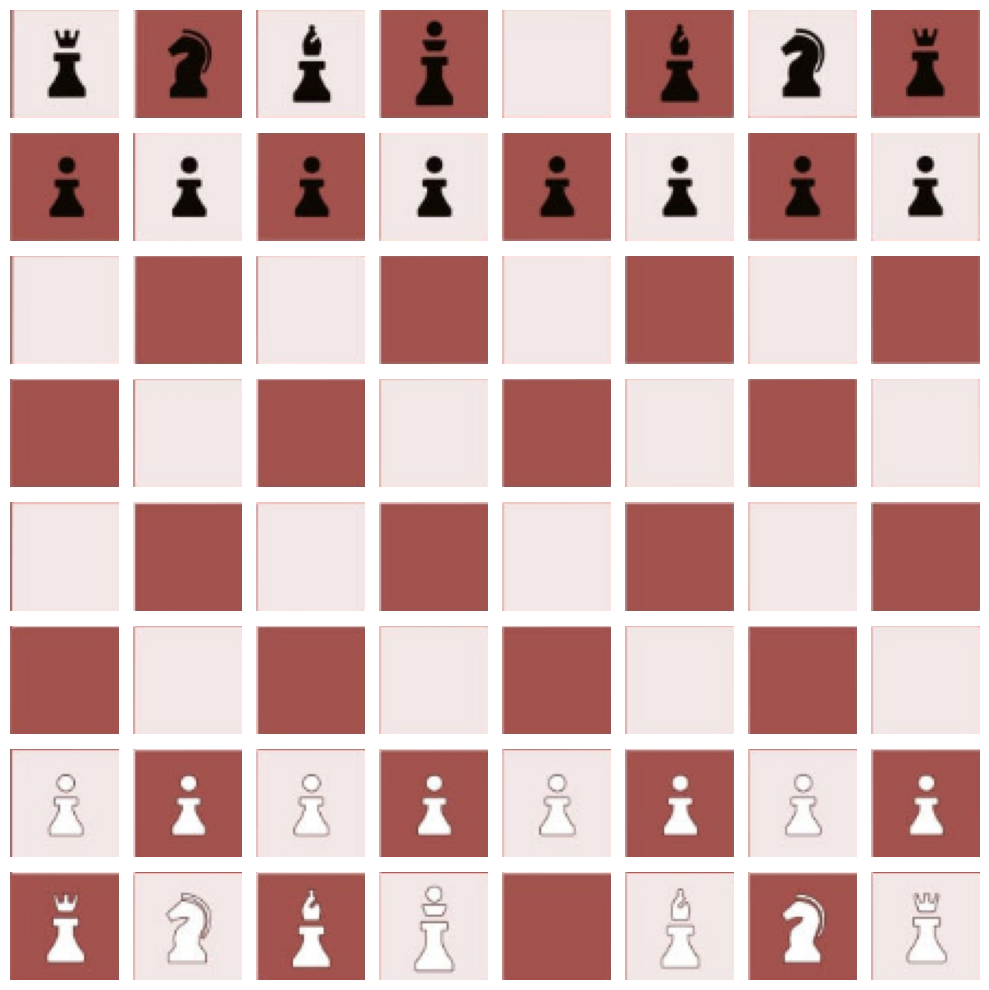

In [7]:
fig, axes = plt.subplots(8, 8, figsize=(10, 10))
for i in range(8):
    for j in range(8):
        axes[i, j].imshow(squares[i][j])
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()